# Predicting Heart Disease using Machine Learning
This notebook looks into using various python-machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

The following approach will be adopted:
1) Problem definition
2) Data
3) Sucess metrics
4) Features
5) Modelling
6) Experimentation/Evaluation

## 1. Problem Definition
In a case study:
Given clinical parameters about a patient,can we predict whether or not they have heart disease?

## 2. Data 
The Original data came from the cleaveland UCI repository, https://archive.ics.uci.edu/dataset/45/heart+disease. it can also be found on Kaggle. 

## 3. Sucess metrics, what defines the sucess of the project?
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept. We will go execute the project.

## 4. Features
This is where different information about each of the data features are understood or better still, employ the knowledge of a subject matter expert especially before the machine learning implementation. Understanding the data would help in order of feature importance and feature engineering-the act of encoding features(categorical) into numbers through one-hot encoding. 

Create Data Dictionary
1. age - age in years
2. sex-(1 = male; 0 = female)
3. cp - chest pain type
   0:Typical angina: chest pain related decrease blood supply to the heart
   1:A typical angina: chest pain not related to heart
   2:Non-anginal pain: typically esophagel spasms(non heart related)
   3:Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure(in mmHg on admission to the hospital) anything concern
5. chol - serum cholestoral in mg/dl
    . Serum = LDL + HDL +.2* triglycerides
    . above 200 is cause for concern
6. fbs - (fasting blood sugar> 120mg/dl)(1=true;0=false)
    .> 126'mg/dl signals diabetes
7. restecg - resting electrocardiographic results
    .0: Nothing to note
    .1: ST-T Wave abnormality
        . can range from mild symptoms to severe problems
        . signals non-normal heart beat
       .2.Possible or definite left ventricular hypertrophy
           .Enlarged heart;s main pumping chamber
8. Thalach-maximum heart rate achieved
9. exang- exercise induced angina(1=yes;0=no)
10. oldpeak-ST depression induced by exercise relative to rest 
11. Slope- the slope of the peak exercise ST segment
    .0: Upsloping: better heart rate with exercise (uncommon)
    .1: Flatsloping: minimal change (typical healthy heart)
    .2: Downslopings: signs of unhealthy heart
12. ca- number of major vessels (0-3) colored by flourosopy
    . colored vessel means the doctor can see the blood passing through
    . the more blood movement the better (no clots)
13. thal- thalum stress result
    . 1,3: normal
    . 6: fixed defect: used to be detect but ok now
    . 7: reversible defect: no proper blood movement when exercising
14. target - have disease or not(1=yes, 0=no) (= the predicted attribute)



## Preparing the tools
Using pandas, Matplotlib and Numpy for data analysis and manipulation

In [2]:
# Import all the tools needed

# The EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploratory data analysis
In this phase, aim to become a subject matter expert(i.e try to understand the data you are working with)
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types of features in the data
3. What is missing from the data and how do we fix the missing data?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# looking at the target variable, let's find out the number of classes/catergory
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

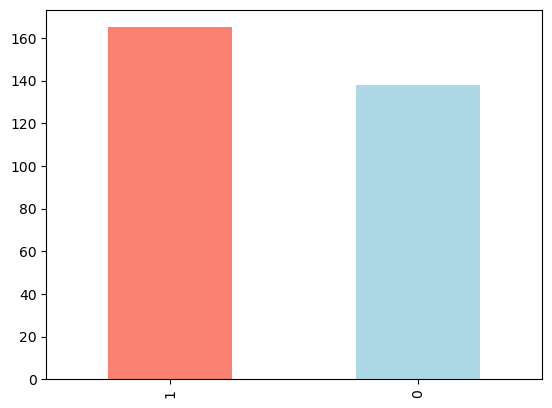

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [10]:
# check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# check for statistical information of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

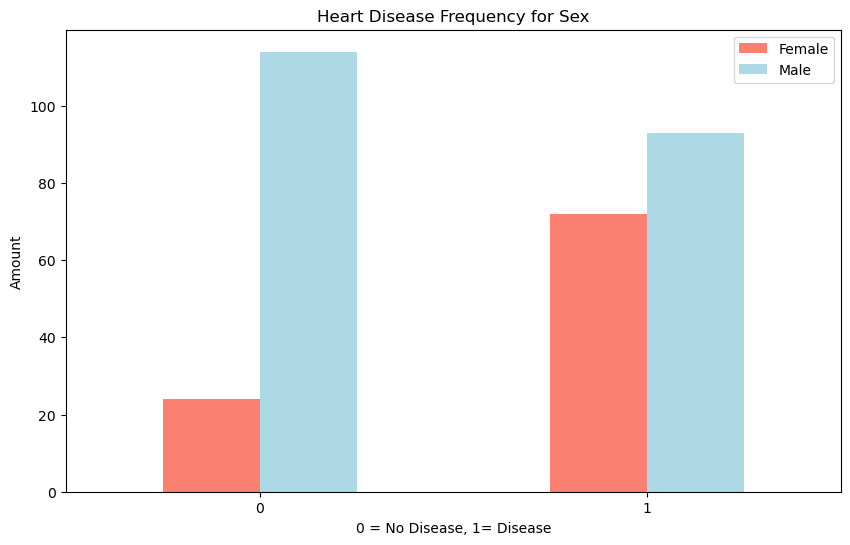

In [18]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [19]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Comparing Age and Max Heart Rate for Heart Disease

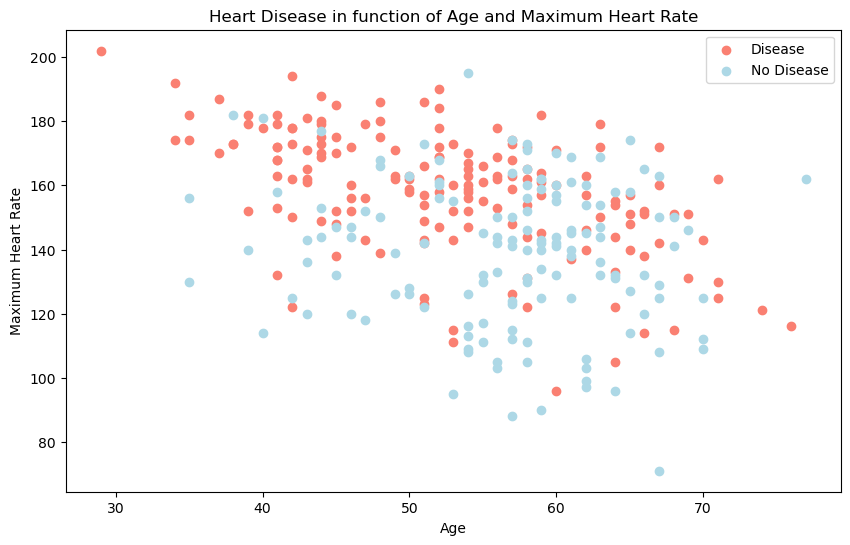

In [23]:
# create another figure
plt.figure(figsize=(10,6))

# plot scatter graph with positive samples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")
# plot scatter graph with negatve examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           color="lightblue")

# making the graph more readable
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

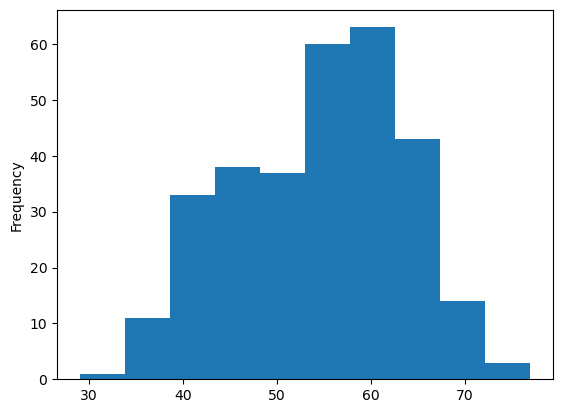

In [24]:
# check the distribution of the age column with a histogram
df.age.plot.hist()

### Compare heart disease frequency vs Chest pain Type
3. cp - chest pain type 
  .0:Typical angina: chest pain related decrease blood supply to the heart   .1:A typical angina: chest pain not related to heart 
  .2:Non-anginal pain: typically esophagel spasms(non heart related)
  .3:Asymptomatic: chest pain not showing signs of disease 

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

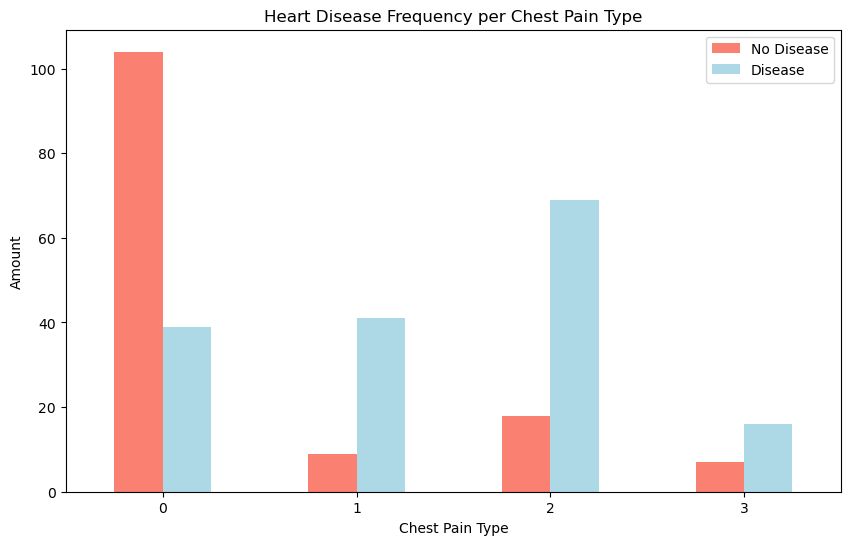

In [29]:
# Create a visualization of the cross tab
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                color=["salmon","lightblue"])
# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [31]:
# Create a correlationb matrix- means how each of the features relate witj each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, 0.0)

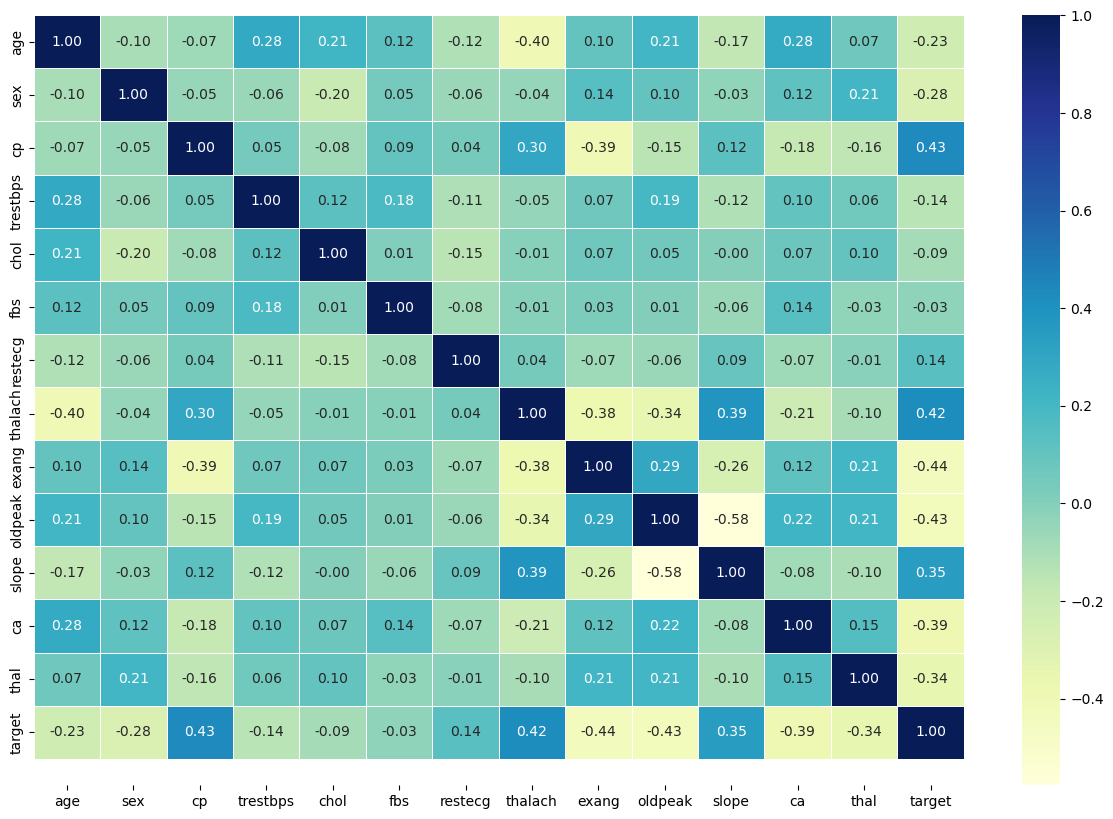

In [42]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)


## Modelling

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
# split data into X and Y
X = df.drop("target", axis = 1)
y = df["target"]

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [47]:
# split the data
np.random.seed(42)

# Split into train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [50]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [51]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

It's time to build a machine learning model.
We will train it(find patterns on the training set)
Then, we'll use the patterns found on the test set).
Trying out three (3) different machine learning model
1) Logistic Regression
2) Random Forest Classifier
3) K-Nearest Neighbors Classifier

In [54]:
# For ease of operations and smarter work rate:
# I will be create a dictionary for the three models being implemented
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates aforementioned machine learning models.
    models: a dictionary of different Scikit-Learn models.
    X_train: training data(no_labels)
    X_test: testing data (no_labels)
    y_train: training data(labels)
    y_test: test data(labels)
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # fit the model to the data 
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [56]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\akink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akink\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

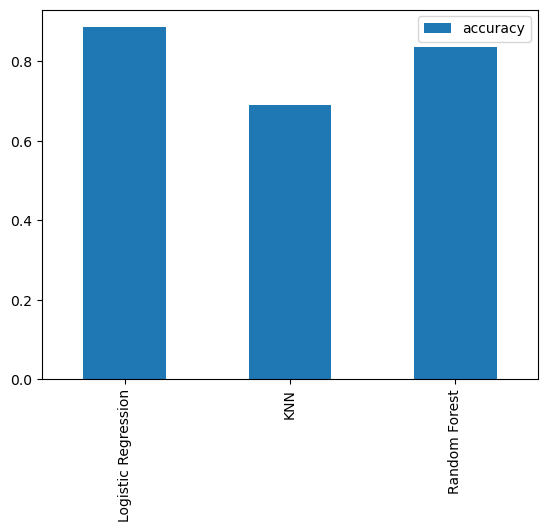

In [59]:
# Visualise the scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now there is a baseline model. However, the model can still be improved upon. Hyper-parameter tuning should be the next thing to try!!

We should explore the following;
1. Hyper-parameter tuning
2. Feature importance
3. Confusion matrix
4. Cross Validation
5. Precision
6. Recall
7. F1 Score
8. Classification report
9. ROC Curve
10. Area Under the curve(AUC)

### Hyperparameter Tuning

In [66]:
# Explore tuning KNN model
train_scores = []
test_scores = []

# create a list of different values  for n neighbors
neighbors = range(1,21,1)

# Set up KNN instance
KNN = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    
    # fit the algorithm
    KNN.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(KNN.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(KNN.score(X_test,y_test))

C:\Users\akink\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\akink\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\akink\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\akink\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [67]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [68]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41


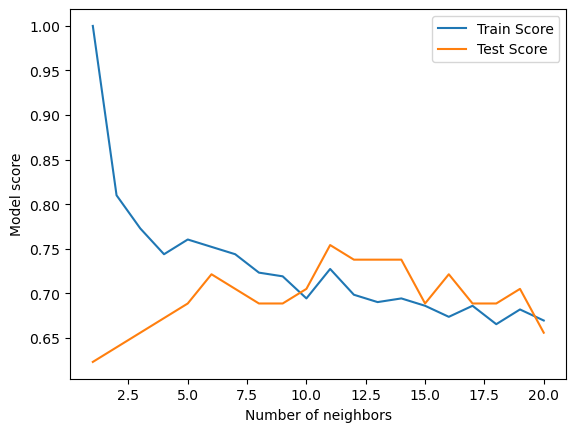

In [69]:
# visualize this scores
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)* 100:.2f}")

### Hyper-parameter tuning with Randomized Search CV
* Exploring Logistic Regression model
* Random Forest Classifier
* CV stands for cross validation, model is trained on different versions of training data and evaluated on different versions of test data based on number of splits chosen.

In [80]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4, 4,20),
               "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

### Now that the hyperparameters have been set up, tune them using Randomized search CV

In [75]:
# Tune Logistic Regression
np.random.seed(42)

# set up random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit Random Hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [77]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### Hyperparameter Tuning for Random forest Classifier

In [81]:
# Set up random seed
np.random.seed(42)

# set up random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit Random Forest Classifier Model 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [82]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [83]:
# Evaluate the Randomized search Classifier Model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [85]:
# check the base model again
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with Grid Search CV
since the logistic Regression model gave the best score, It's time to improve it again using GridSearchCV

In [87]:
# Different hyperparameters for Logistic Regression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# set up grid hyper parameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [88]:
# check the best hyperparameters
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [90]:
# check the baseline model score again
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our fine tuned machine learning classification, beyond accuracy
* ROC Curve and AUC Score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-Score
* In order to make comparisons and evaluate our trained model, we need to make predictions

In [91]:
# Make predictions with fine-tuned(trained) model
y_preds = gs_log_reg.predict(X_test)

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\akink\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


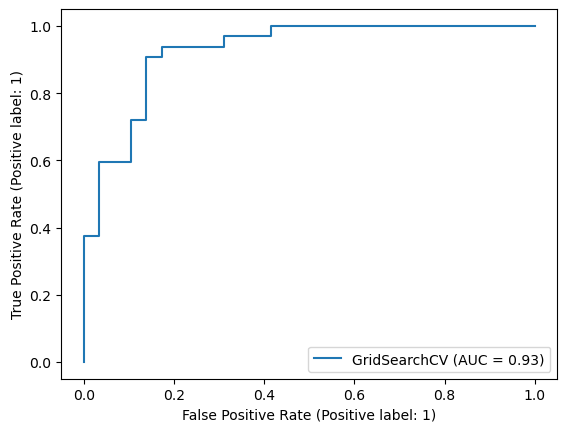

In [93]:
# Plot ROC Curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test,y_test)

In [94]:
# Plot confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


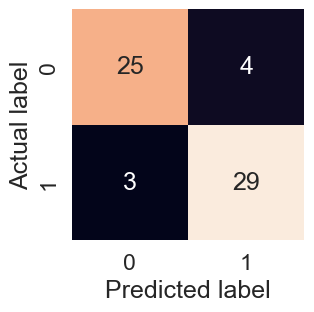

In [99]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a good visualization of confusion matrix  with seaborn library
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,y_preds)

### From the confusion matrix above;
* False positive = 3
* False Negative = 4
* True  Negatives = 25
* True Positives = 29

### It's time to get the classification report as well as cross validated precision, recall and F1 score

In [100]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation
* Using cross validation score to evaluate accuracy, precision, recall and f1 score using scikit-learn cross_val_score()

In [101]:
# check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
# create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418, solver="liblinear")

In [103]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,y,cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [106]:
# take the mean of the cross validation based on accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [110]:
# cross validated precision
cv_precision = cross_val_score(clf,
                              X,y,cv=5, scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [111]:
# take the mean of the cross validation based on precision
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [114]:
# cross validated recall
cv_recall = cross_val_score(clf,
                              X,y,cv=5, scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [115]:
# take the mean of the cross validation based on recall
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [116]:
# cross validated f1 score
cv_f1 = cross_val_score(clf,
                              X,y,cv=5, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [117]:
# take the mean of the cross validation based on f1
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

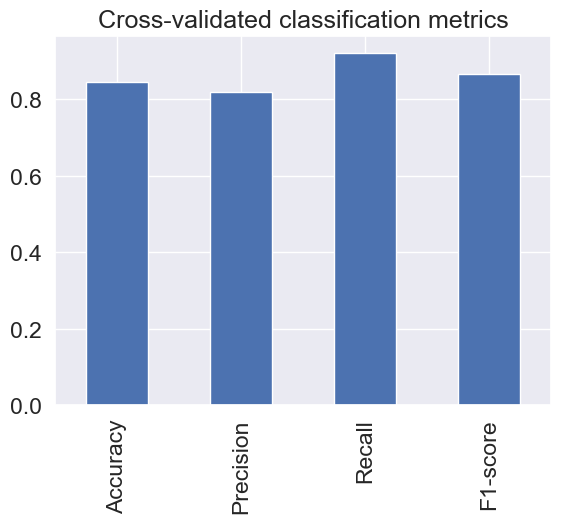

In [119]:
# Visualize the cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision":cv_precision,
                           "Recall": cv_recall,
                           "F1-score":cv_f1}, 
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                   legend=False)

### Feature Importance
Feature Importance; which features contributed most to the outcomes of the model and how did they contribute?

* Determining feature importance is different for each model
* Now, its time to find the feature importance for logistic Regression model


In [122]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train,y_train);

In [123]:
# check coefficients
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [124]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
# Match Coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<AxesSubplot:title={'center':'Feature Importance'}>

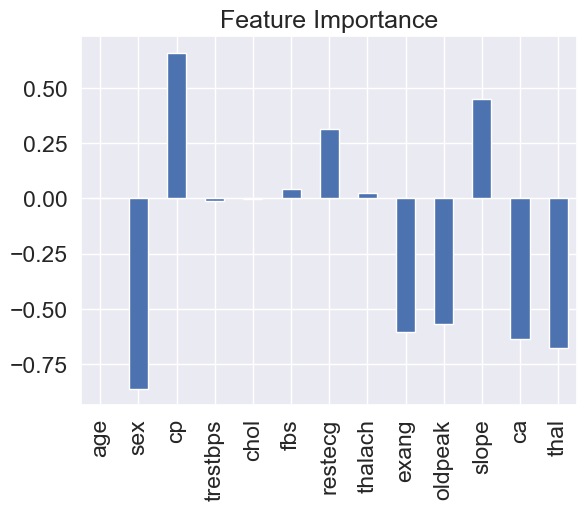

In [126]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False)

In [127]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [128]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


#### Slope - means the slope of the peak exercise ST segment
* 0: Upsloping : better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change(typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

## 6. EXPERIMENTATION
if you haven;t hit your evaluation metric yet, what are the things we could try?
* Could you collect more data?
* Could you try a better model? like catboost or XGboost?
* Could you improve the current models? 
* Finally, there is still room for extension which is implementing a model like XG boost.  would it  improve the score?